# Link para o vídeo: https://youtu.be/lpC5nzmVNDU

In [1]:
import pandas as pd
import nltk
import spacy
from gensim import corpora, models
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
from gsdmm import MovieGroupProcess
# import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import re
import random
import numpy as np

In [2]:
stop_words = set(stopwords.words('portuguese')) | set(stopwords.words('english'))
nlp = spacy.load('pt_core_news_lg')

In [3]:
abreviacoes = {
    # Português
    "vc": "você", "q": "que", "pq": "porque", "blz": "beleza", "obg": "obrigado",
    "vlw": "valeu", "td": "tudo", "hj": "hoje", "tb": "também", "sdd": "saudade",
    "msg": "mensagem", "mn": "mano", "tm": "tamo", "pdc": "pode crer", "gnt": "gente",
    "mddc": "meu deus do céu", "plmdds": "pelo amor de deus", "sdds": "saudades",
    "sqn": "só que não", "vdd": "verdade", "slk": "se é louco", "mlr": "melhor",
    "tlgd": "tá ligado", "pv": "privado", "plmns": "pelo menos", "ngc": "negócio",
    "fzr": "fazer", "dps": "depois", "ft": "foto", "fml": "família", "rlx": "relaxa",
    "fut": "futebol", "bj": "beijo", "ajd": "ajuda", "hrs": "horas", "nd": "nada",
    "pfv": "por favor", "att": "ah tá", "msm": "mesmo", "add": "adicionar",
    "amg": "amigo", "amga": "amiga", "cmg": "comigo", "glr": "galera",
    "pprt": "papo reto", "cvs": "conversar", "ss": "sim", "qt": "quanto", "nn": "não",
    "clr": "celular", "sla": "sei lá", "qria": "queria", "qser": "quiser",
    "pft": "perfeito", "dnv": "de novo", "sm": "sem", "cm": "com", "vms": "vamos",
    "flw": "falou", "trd": "tarde", "aq": "aqui", "bnt": "bonito", "ngm": "ninguém",

    # Inglês
    "lol": "laughing out loud", "brb": "be right back", "btw": "by the way",
    "idk": "i do not know", "omg": "oh my god", "ttyl": "talk to you later",
    "imo": "in my opinion", "imho": "in my humble opinion", "tbh": "to be honest",
	"asap": "as soon as possible", "lmk": "let me know", "np": "no problem",
    "ty": "thank you", "thx": "thanks", "yw": "you are welcome", "bff": "best friend forever",
    "gr8": "great", "u": "you", "ur": "your", "pls": "please", "plz": "please",
    "bday": "birthday", "cu": "see you", "afaik": "as far as i know",
    "smh": "shaking my head", "fyi": "for your information", "wtf": "what the fuck",
    "wyd": "what are you doing", "ikr": "i know right", "nvm": "never mind"
}


In [4]:
def preprocessar(mensagem):
    # Lowercase
    try:
        mensagem = mensagem.lower()
    except:
        return ''

    # Remover risadas tipo "kkk", "hahaha", etc
    mensagem = re.sub(r"\b(k+|h+)(a+|e+|i+|o+|u+){2,}\b", "", mensagem)

    # Reduzir repetições exageradas de letras (ex: "nooooosssaaa" → "noossaa")
    mensagem = re.sub(r'(.)\1{2,}', r'\1\1', mensagem)

    # Remover emojis e símbolos não alfanuméricos
    mensagem = re.sub(r"[^\w\s,.!?]", "", mensagem)

    # Remover links e menções
    mensagem = re.sub(r"(https?://\S+|@\w+)", "", mensagem)

    # Substituir abreviações
    for abrev, exp in abreviacoes.items():
        mensagem = re.sub(rf"\b{abrev}\b", exp, mensagem)

    # Tokenizar e lematizar com spaCy
    doc = nlp(mensagem)

    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha              # apenas palavras (sem pontuação)
        and token.lemma_ not in stop_words
        and len(token) > 2             # remover palavras muito curtas
    ]

    return tokens

In [5]:
df = pd.read_csv('/home/guilherme-sales/Data_Science_UFC_CKP9011_2025.1/data/grouped_atvd5.csv', index_col='Unnamed: 0')
txts = list(df['texto_limpo'].values)
proc_text = [preprocessar(txt) for txt in txts]

In [6]:
proc_text = [doc for doc in proc_text if isinstance(doc, list)]

## LDA

In [12]:
dictionary = corpora.Dictionary(proc_text)
corpus = [dictionary.doc2bow(text) for text in proc_text]	

Quantidade de tópicos selecionada: 1
	Tópico 1: 0.025*"nao" + 0.010*"ir" + 0.008*"todo" + 0.007*"poder" + 0.007*"fazer" + 0.006*"bolsonaro" + 0.005*"user" + 0.005*"povo" + 0.005*"pra" + 0.004*"voce"
Quantidade de tópicos selecionada: 2
	Tópico 1: 0.008*"user" + 0.004*"fonte" + 0.004*"company" + 0.004*"tmealexeconomia" + 0.004*"vacina" + 0.003*"mercado" + 0.003*"congratulations" + 0.003*"ano" + 0.003*"platform" + 0.003*"empresa"
	Tópico 2: 0.029*"nao" + 0.011*"ir" + 0.009*"todo" + 0.008*"poder" + 0.008*"fazer" + 0.007*"bolsonaro" + 0.006*"povo" + 0.005*"pra" + 0.005*"voce" + 0.005*"dizer"
Quantidade de tópicos selecionada: 3
	Tópico 1: 0.012*"user" + 0.010*"company" + 0.008*"congratulations" + 0.007*"platform" + 0.005*"see" + 0.004*"time" + 0.004*"really" + 0.004*"investment" + 0.004*"invest" + 0.003*"good"
	Tópico 2: 0.039*"nao" + 0.015*"ir" + 0.010*"fazer" + 0.010*"todo" + 0.010*"poder" + 0.009*"bolsonaro" + 0.008*"povo" + 0.007*"pra" + 0.006*"agora" + 0.006*"presidente"
	Tópico 3: 0.

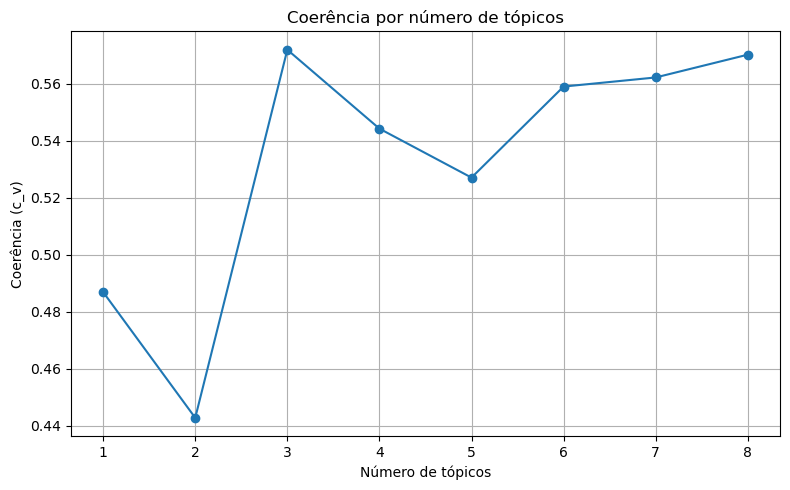

In [24]:
coherence_evolution = []

for topic_value in range(8):
    lda_model = models.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=topic_value+1,
        random_state=42,
        passes=10,
        alpha='auto',
        per_word_topics=True
    )
    print('Quantidade de tópicos selecionada:', topic_value+1)
    for idx, topic in lda_model.print_topics(-1):
        print(f"\tTópico {idx+1}: {topic}")
    coherence_model = CoherenceModel(model=lda_model, texts=proc_text, dictionary=dictionary, coherence='c_v')
    coherence_evolution.append(coherence_model.get_coherence())
    

x = list(range(1, len(coherence_evolution)+1))  

plt.figure(figsize=(8, 5))
plt.plot(x, coherence_evolution, marker='o')  
plt.title("Coerência por número de tópicos")
plt.xlabel("Número de tópicos")
plt.ylabel("Coerência (c_v)")
plt.grid(True)
plt.tight_layout()
plt.show()

## GSDMM

In [11]:
vocab = set(word for doc in proc_text for word in doc)

# Instanciar o modelos
mgp = MovieGroupProcess(K=20, alpha=0.1, beta=0.3, n_iters=30)

# Treinar o modelo
doc_topics = mgp.fit(proc_text, len(vocab))

In stage 0: transferred 151281 clusters with 20 clusters populated
In stage 1: transferred 93862 clusters with 20 clusters populated
In stage 2: transferred 39772 clusters with 19 clusters populated
In stage 3: transferred 28133 clusters with 17 clusters populated
In stage 4: transferred 24267 clusters with 17 clusters populated
In stage 5: transferred 22340 clusters with 16 clusters populated
In stage 6: transferred 21258 clusters with 16 clusters populated
In stage 7: transferred 20634 clusters with 15 clusters populated
In stage 8: transferred 20464 clusters with 15 clusters populated
In stage 9: transferred 20233 clusters with 15 clusters populated
In stage 10: transferred 20298 clusters with 15 clusters populated
In stage 11: transferred 20323 clusters with 15 clusters populated
In stage 12: transferred 20175 clusters with 15 clusters populated
In stage 13: transferred 20168 clusters with 15 clusters populated
In stage 14: transferred 20022 clusters with 15 clusters populated
In s

In [17]:
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(
            mgp.cluster_word_distribution[cluster].items(),
            key=lambda k: k[1],
            reverse=True,
        )[:values]
        print('Cluster %s : %s'%(cluster,sort_dicts))
        print(' — — — — — — — — — ')

doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)
print('*'*20)

# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-10:][::-1]
print('Most important clusters (by number of docs inside):', top_index)
print('*'*20)


Number of documents per topic : [ 1251 29655    97  8570 70483 22755     4     0     0    80     0     0
   158    92  2619     0  5529     0    73 20091]
********************
Most important clusters (by number of docs inside): [ 4  1  5 19  3 16 14  0 12  2]
********************


In [19]:
top_words(mgp.cluster_word_distribution, top_index, 10)

Cluster 4 : [('nao', 43431), ('ir', 20874), ('fazer', 11084), ('bolsonaro', 10903), ('pra', 10888), ('poder', 10487), ('todo', 9901), ('povo', 8150), ('presidente', 8111), ('grupo', 6998)]
 — — — — — — — — — 
Cluster 1 : [('nao', 15320), ('ir', 5460), ('fazer', 4316), ('pra', 3709), ('todo', 3576), ('bolsonaro', 3483), ('querer', 3396), ('Lula', 3197), ('falar', 3137), ('voce', 2887)]
 — — — — — — — — — 
Cluster 5 : [('bolsonaro', 6691), ('Lula', 3941), ('nao', 3549), ('user', 2818), ('canal', 2542), ('presidente', 2475), ('Brasil', 2045), ('ir', 1907), ('video', 1875), ('tse', 1839)]
 — — — — — — — — — 
Cluster 19 : [('nao', 17560), ('todo', 7231), ('poder', 6617), ('fazer', 5192), ('dizer', 4813), ('sobre', 3914), ('bolsonaro', 3831), ('Brasil', 3761), ('ano', 3760), ('dia', 3693)]
 — — — — — — — — — 
Cluster 3 : [('company', 1981), ('congratulations', 1975), ('platform', 1561), ('user', 1560), ('good', 927), ('investment', 868), ('really', 806), ('invest', 710), ('happy', 667), ('be

## PTM (Pseudo-document based Topic Model)

In [20]:
import tomotopy as tp

In [23]:
mdl = tp.PTModel(k=3, p=5, tw=tp.TermWeight.IDF, min_cf=3, min_df=2, rm_top=0, alpha=0.1, eta=0.01, seed=42)
for msg in proc_text:
    mdl.add_doc(msg)

for i in range(0, 1000, 100):
    mdl.train(100)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

for k in range(mdl.k):
    print('Top 10 words of topic #{}'.format(k))
    print(mdl.get_topic_words(k, top_n=10))

/tmp/ipykernel_80193/3689773630.py:6: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(100)


Iteration: 0	Log-likelihood: -9.046329781714618
Iteration: 100	Log-likelihood: -8.929242292870704
Iteration: 200	Log-likelihood: -8.891252092282887
Iteration: 300	Log-likelihood: -8.86046766129423
Iteration: 400	Log-likelihood: -8.842756019395713
Iteration: 500	Log-likelihood: -8.828854179687529
Iteration: 600	Log-likelihood: -8.816729847573603
Iteration: 700	Log-likelihood: -8.805634157129898
Iteration: 800	Log-likelihood: -8.796476214985464
Iteration: 900	Log-likelihood: -8.787054483948394
Top 10 words of topic #0
[('company', 0.005721154622733593), ('congratulations', 0.005382072180509567), ('platform', 0.00487837428227067), ('tmealexeconomia', 0.004226486198604107), ('bdm', 0.003505005966871977), ('mercado', 0.003409877186641097), ('bilhoes', 0.00319185433909297), ('user', 0.0031914259307086468), ('fonte', 0.0030690140556544065), ('investment', 0.0030027476605027914)]
Top 10 words of topic #1
[('nao', 0.010451256297528744), ('ir', 0.006791919469833374), ('fazer', 0.0056251650676131

In [24]:
mdl.summary()

<Basic Info>
| PTModel (current version: 0.13.0)
| 161410 docs, 3042636 words
| Total Vocabs: 123508, Used Vocabs: 38161
| Entropy of words: 8.07823
| Entropy of term-weighted words: 8.91249
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 1000, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -8.78705
|
<Initial Parameters>
| tw: TermWeight.IDF
| min_cf: 3 (minimum collection frequency of words)
| min_df: 2 (minimum document frequency of words)
| rm_top: 0 (the number of top words to be removed)
| k: 3 (the number of topics between 1 ~ 32767)
| p: 5 (the number of pseudo documents The default value is changed to `10 * k`.)
| alpha: [0.1] (hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 42 (random seed)
| trained in version 0.13.0
|
<Parameters>


## BERTopic

In [7]:
from bertopic import BERTopic

/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
proc_text_strs = [' '.join(sublist) for sublist in proc_text]

In [ ]:
topic_model = BERTopic(language="portuguese")

topics, probs = topic_model.fit_transform(proc_text_strs)
df_topics = topic_model.get_topic_info()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [10]:
df_topics

Topic  Count                                            Name  \
0       -1  81261                    -1_bolsonaro_brasil_nao_todo   
1        0   5985                0_video_youtube_assista_assister   
2        1   2771    1_presidente_pronunciamento_pronunciar_trump   
3        2   2088                    2_votar_voto_votacao_eleitor   
4        3   1195                   3_vacina_vacinar_covid_vacino   
..     ...    ...                                             ...   
817    816     10  816_argentino_live_tseglobalistasforo_saopaulo   
818    817     10         817_garcia_itatibajundiai_canalar_vegir   
819    818     10            818_forcasarmar_midia_poupara_tempao   
820    819     10   819_desculpar_acentuacao_dialogo_interrogacao   
821    820     10                     820_calvo_xvi_luis_reprende   

                                        Representation  \
0    [bolsonaro, brasil, nao, todo, voce, povo, pod...   
1    [video, youtube, assista, assister, postar, an...   
2    [presidente, pronunciamento, pronunciar, trump...   
3    [votar, voto, votacao, eleitor, urna, secao, c...   
4    [vacina, vacinar, covid, vacino, vacinacao, pf...   
..                                                 ...   
817  [argentino, live, tseglobalistasforo, saopaulo...   
818  [garcia, itatibajundiai, canalar, vegir, alexa...   
819  [forcasarmar, midia, poupara, tempao, banaliza...   
820  [desculpar, acentuacao, dialogo, interrogacao,...   
821  [calvo, xvi, luis, reprende, despedacaram, gra...   

                                   Representative_Docs  
0    [Brasil dolar futuro fechar ajuste dolx Ibov f...  
1    [assista sim poder perder pai youtube, assista...  
2    [voce chamar povo pra rua presidente esperar, ...  
3    [votacao vao, falar eleitor urna, Sao numero v...  
4    [caso raro tallahassee florido hoje cirurgiao ...  
..                                                 ...  
817  [pessoa baixar colocar conta todo tres live so...  
818  [ficar feliz ver Alexandre Garcia de aquele gl...  
819  [opiniao dever ler publico representante grand...  
820  [nao saber teor conversa anterior nao vir fala...  
821  [descobrir agora bolsonaro fechar me aconaria ...  

[822 rows x 5 columns]

In [11]:
topic_id = 0  
print(f"Tópico {topic_id}:", topic_model.get_topic(topic_id))

Tópico 0: [('video', 0.021723654019797922), ('youtube', 0.018295949918899046), ('assista', 0.012973429243606647), ('assister', 0.005305724759167258), ('postar', 0.0040341055512828254), ('antigo', 0.0033851917045728606), ('ver', 0.003196990852883441), ('filme', 0.0031512190406528693), ('canal', 0.0030588601091757405), ('assistir', 0.003057135885052983)]


In [ ]:
for i, doc in enumerate(proc_text_strs):
    top = topics[i]
    top_words = topic_model.get_topic(top)
    print(f"\n📄 {doc}\nTópico {top}: {top_words}")


In [ ]:
topic_model.visualize_topics()